In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf  
from sklearn import metrics
import os
import math
import pandas as pd

/Users/admin/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/admin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
def sigma_each(x):
    std = np.std(x, axis=0 , ddof= 1)
    std = np.array(std)
    aa = Math.pow(std,2)
    return aa

In [4]:
def AI(arr):
    trisum = 0
    result = []
    for i in range(len(arr)):
        for j in range(3):
            trisum += arr[i][j]
        
        result.append(Math.sqrt(Math.max(trisum/3,0)))
    result = np.array(result)
    return result

In [5]:
INPUT_SIGNAL_TYPES = [
    "total_acc_x_",
    "total_acc_y_",
    "total_acc_z_"
]

# Output classes to learn how to classify
LABELS = [
    "WALKING",
    "WALKING_UPSTAIRS",
    "WALKING_DOWNSTAIRS",
    "SITTING",
    "STANDING",
    "LAYING"
]

In [6]:
def load_X(X_signals_paths):
    X_signals = []

    for signal_type_path in X_signals_paths:
        file = open(signal_type_path, 'r')
        # Read dataset from disk, dealing with text files' syntax
        X_signals.append(
            [np.array(serie, dtype=np.float32) for serie in [
                row.replace('  ', ' ').strip().split(' ') for row in file
            ]]
        )
        file.close()

    return np.transpose(np.array(X_signals), (1, 2, 0))

X_train_signals_paths = [
      "UCI HAR Dataset/train/" + "Inertial Signals/" + signal + "train.txt" for signal in INPUT_SIGNAL_TYPES
]
X_test_signals_paths = [
    "UCI HAR Dataset/test/" + "Inertial Signals/" + signal + "test.txt" for signal in INPUT_SIGNAL_TYPES
]

X_train = load_X(X_train_signals_paths)
X_test = load_X(X_test_signals_paths)

# Load "y" (the neural network's training and testing outputs)

def load_y(y_path):
    file = open(y_path, 'r')
    # Read dataset from disk, dealing with text file's syntax
    y_ = np.array(
        [elem for elem in [
            row.strip().split(' ') for row in file   #.replace('  ', ' ')
        ]],
        dtype=np.int32
    )
    file.close()

    # Substract 1 to each output class for friendly 0-based indexing
    return y_ - 1

y_train_path = "UCI HAR Dataset/train/y_train.txt"
y_test_path = "UCI HAR Dataset/test/y_test.txt"

y_train = load_y(y_train_path)
y_test = load_y(y_test_path)

In [7]:
print(y_train[0][0])
print(y_test)

4
[[4]
 [4]
 [4]
 ...
 [1]
 [1]
 [1]]


In [8]:
X_train_dict = {}
labels_count = len(LABELS)
all_xy_train = []

for i in range(labels_count):
    X_train_dict[i] = []

for i in range(len(X_train)):
    for X_i in X_train[i]:
        X_i = [float(x) for x in X_i]
        X_train_dict[y_train[i][0]].append(X_i)
        all_xy_train.append([X_i,y_train[i][0]])

## Load Subject

In [9]:
def load_subject(subject_path):
    file = open(subject_path,'r')
    # Read dataset from disk, dealing with text file's syntax
    s_ = np.array(
        [elem[0] for elem in [
            row.replace('  ', ' ').strip().split(' ') for row in file
        ]],
        dtype=np.int32
    )
    file.close()
    
    return s_
    
subject_train_path = "UCI HAR Dataset/train/subject_train.txt"
subject_test_path = "UCI HAR Dataset/test/subject_test.txt"

subject_train = load_subject(subject_train_path)
subject_test = load_subject(subject_test_path)

len_train = len(subject_train)
len_test = len(subject_test)

In [10]:
print(subject_train)

[ 1  1  1 ... 30 30 30]


## Create a dictionary for subject

In [11]:
len_train = len(y_train)
len_test = len(y_test)

len_subj = 30
y_train_dict = {}

for i in range(1,len_subj+1):
    y_train_dict[i] = []
    
    
for i in range(len_train):
    y_train_dict[subject_train[i]].append([y_train[i][0],X_train[i]])  

for i in range(1,len_subj+1):
    print(i,len(y_train_dict[i]))
    
print('-------')

for i in range(10):
    print(y_train_dict[1][i][1])

1 347
2 0
3 341
4 0
5 302
6 325
7 308
8 281
9 0
10 0
11 316
12 0
13 0
14 323
15 328
16 366
17 368
18 0
19 360
20 0
21 408
22 321
23 372
24 0
25 409
26 392
27 376
28 382
29 344
30 383
-------
[[ 1.012817   -0.1232167   0.1029341 ]
 [ 1.022833   -0.1268756   0.1056872 ]
 [ 1.022028   -0.1240037   0.1021025 ]
 [ 1.017877   -0.1249279   0.1065527 ]
 [ 1.02368    -0.1257667   0.1028135 ]
 [ 1.016974   -0.124462    0.1074931 ]
 [ 1.017746   -0.1273606   0.1093857 ]
 [ 1.019263   -0.1278912   0.1038862 ]
 [ 1.016417   -0.1258682   0.1024732 ]
 [ 1.020745   -0.1243682   0.0975659 ]
 [ 1.018643   -0.1231382   0.09764665]
 [ 1.019521   -0.1213345   0.09537356]
 [ 1.02026    -0.1183578   0.09367106]
 [ 1.018041   -0.120062    0.09921876]
 [ 1.020829   -0.1221186   0.09997368]
 [ 1.018644   -0.12008     0.09889572]
 [ 1.019398   -0.1209017   0.0962825 ]
 [ 1.020399   -0.1213949   0.09765831]
 [ 1.019222   -0.1215677   0.1004408 ]
 [ 1.022093   -0.1246812   0.09846986]
 [ 1.020433   -0.1254896   0.

In [12]:
all_data = []
all_label = []

all_subject = np.hstack((subject_train,subject_test))

for i in range(len(X_train)):
    all_data.append(X_train[i])
    all_label.append(y_train[i])
    
for i in range(len(X_test)):
    all_data.append(X_test[i])
    all_label.append(y_test[i])
    
all_dict = {}
for i in range(1,len_subj+1):
    all_dict[i] = []

for i in range(len(all_data)):
    all_dict[all_subject[i]].append([all_label[i][0],all_data[i]])

## Calculate SD for Rest State

[0.00349329 0.00465817 0.00543154]


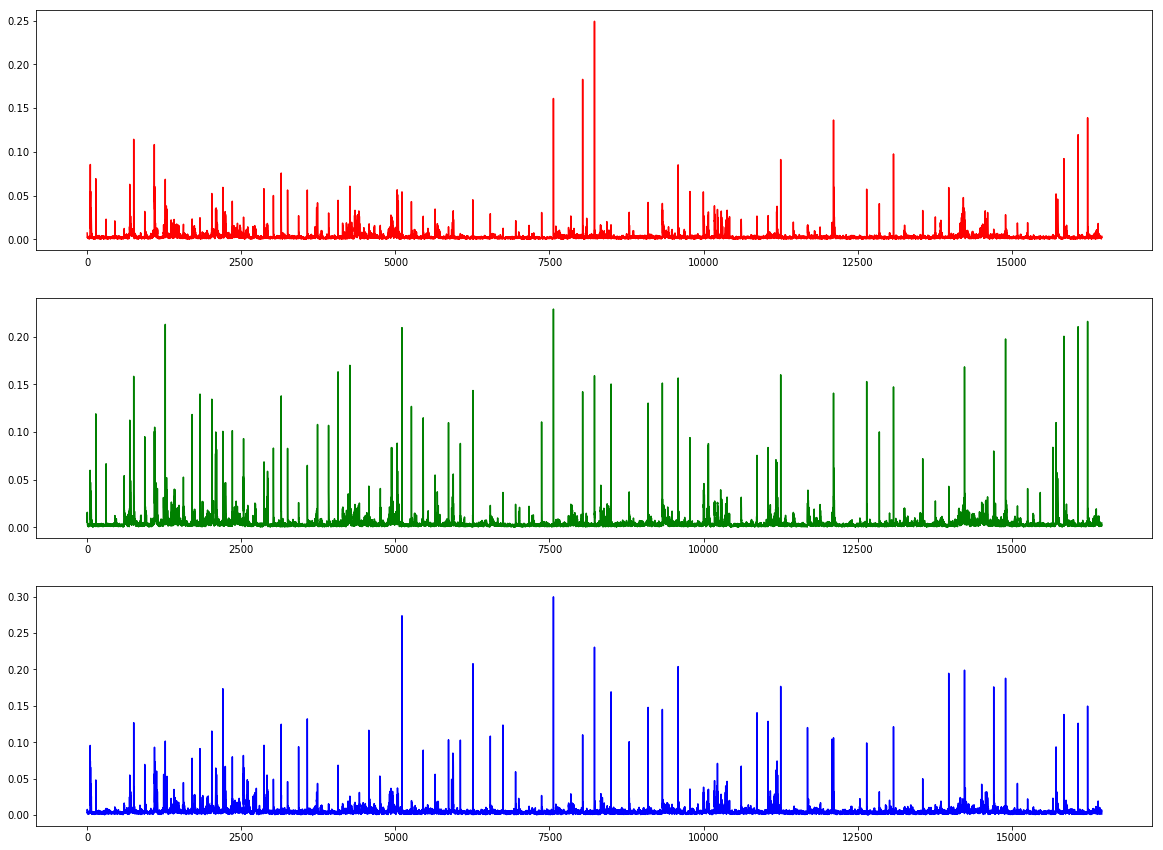

<Figure size 1152x432 with 0 Axes>

In [13]:
idx = [i for i in range(len(LABELS)) if(LABELS[i]=="SITTING")][0]
# print(idx)

rest_dict = X_train_dict[idx]
# print(len(rest_dict))

all_std = []
window = []

cnt = 0
H = 10
for X_i in rest_dict:
    cnt += 1
    window.append(X_i)
    if(cnt==H):
        std_i = np.std(window,axis=0)
        all_std.append(std_i)
        window.clear()
        cnt = 0

all_std = np.array(all_std)
# print(all_std)

C = 0.2
sum_std_i = [0,0,0]
count = [0,0,0]
for elem in all_std:
    for i in range(len(elem)):
        if(elem[i]<=C):
            count[i] += 1
            sum_std_i[i] += elem[i]
    

sum_std_i = np.array(sum_std_i)
count = np.array(count)
std_i_bar = sum_std_i/count
print(std_i_bar)

# std_i_bar_ = [std_i_bar for i in range(3)]
# std_i_bar_ = np.array(std_i_bar_)
# print(std_i_bar_)

all_std_x = [e[0] for e in all_std]
all_std_y = [e[1] for e in all_std]
all_std_z = [e[2] for e in all_std]

fig,ax = plt.subplots(nrows=3, ncols=1, figsize=(20,15))
ax[0].plot(all_std_x,'r')
ax[1].plot(all_std_y,'g')
ax[2].plot(all_std_z,'b')

plt.figure(figsize=(16,6))
plt.show()

In [14]:
def equation_bi(X_i):
    all_std = []
    
    std_i = np.std(X_i,axis=0)
    
    diff_std = std_i**2 - std_i_bar**2
    
    diff_std_ = diff_std / std_i_bar**2
    diff_std = (diff_std + 1) / (std_i_bar**2 + 1)
    
#     print(diff_std_)
#     print('---------')

#     all_std.append(diff_std_)
    all_std = np.array(diff_std)
#     print(all_std)
    
    ai = max(np.sum(all_std)/3,0)
    ai = np.sqrt(ai)
    
#     print(ai)
    
    return ai

## Activity Index

In [15]:
import matplotlib.pyplot as plt
import matplotlib

## AI for each labels

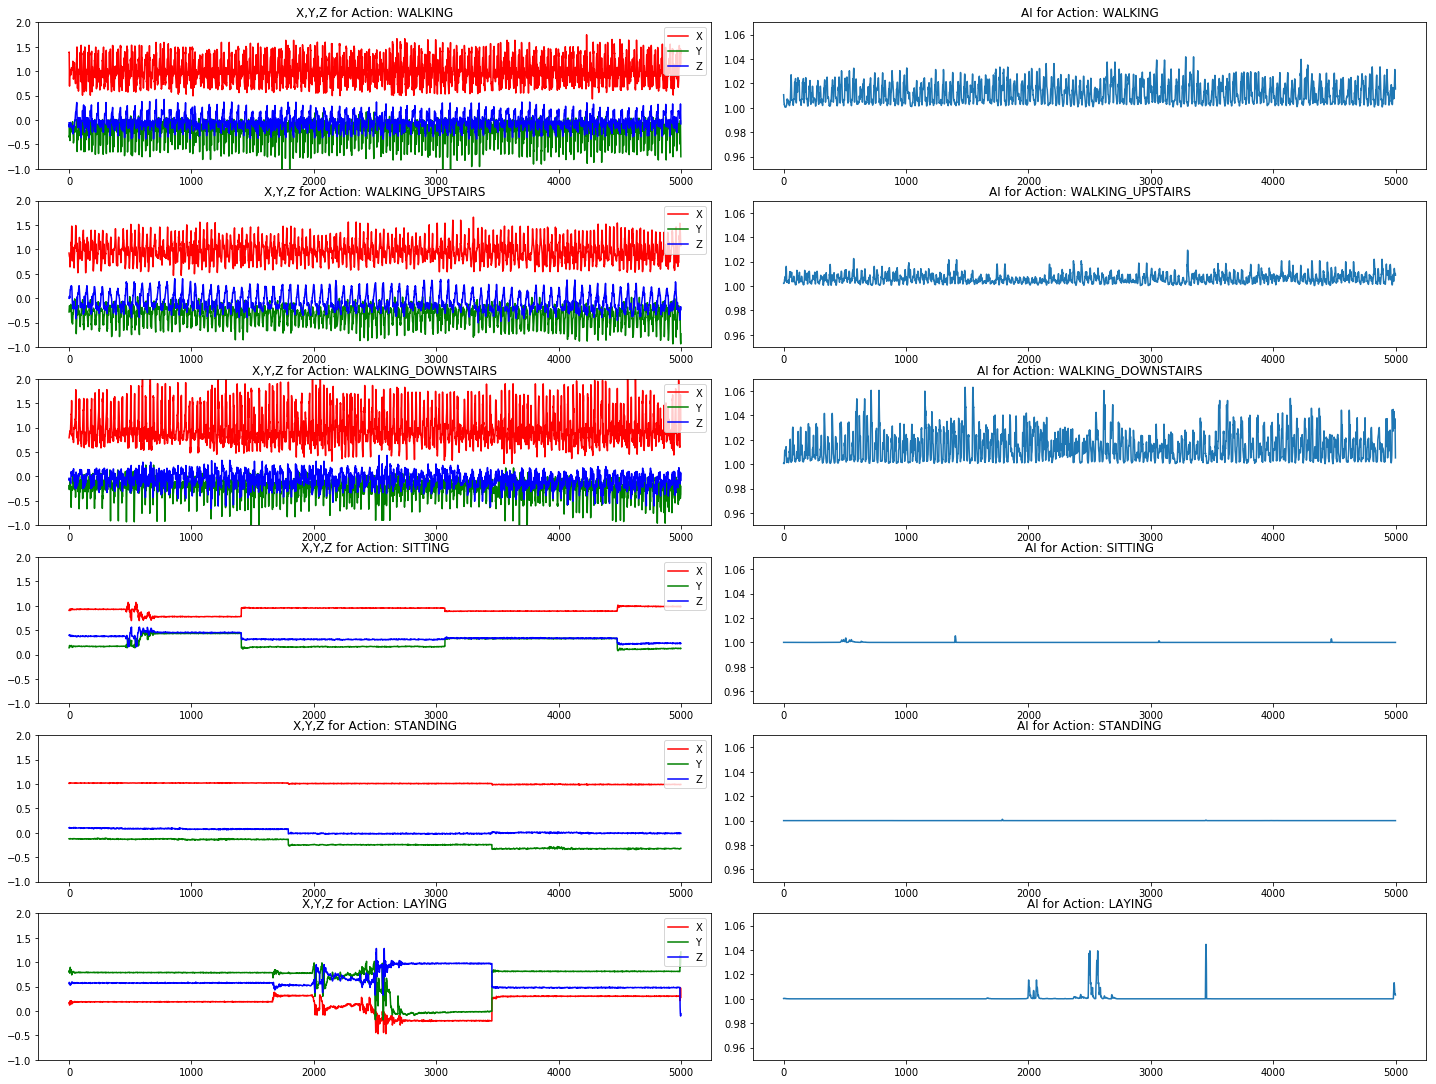

<Figure size 1152x648 with 0 Axes>

In [16]:
fig, axes = plt.subplots(nrows=labels_count, ncols=2, figsize=(20,15))
fig.tight_layout()

X_train_x = []
X_train_y = []
X_train_z = []
X_ai = []

ai_labels = []

count = 0
H = 10

for i in range(labels_count):
    ai_all = []
    
    X_train_dict[i] = np.array(X_train_dict[i])
#     graph_size = int(len(X_train_dict[i]))
    graph_size = 5000
    
    for j in range(graph_size):
        
        if(j+H<len(X_train_dict[i])):
            X_ai.clear()
            
            elem = X_train_dict[i][j]
            X_train_x.append(elem[0])
            X_train_y.append(elem[1])
            X_train_z.append(elem[2])
            
            for k in range(H):
                elem = X_train_dict[i][j+k]
                
                X_ai.append([elem[0],elem[1],elem[2]])
        
            ai_val = equation_bi(X_ai)
            ai_all.append(ai_val)
    
#     print(ai_all)
    ai_labels.append(ai_all)
#     print(ai_labels)
    
    ax = axes[i,0]
    ax.plot(X_train_x,'r',label='X')
    ax.plot(X_train_y,'g',label='Y')
    ax.plot(X_train_z,'b',label='Z')
    ax.set_title('X,Y,Z for Action: ' + LABELS[i])
    ax.set_ylim(bottom=-1.0,top=2.0)
    ax.legend(loc='upper right')
        
    ax = axes[i,1]
    ax.plot(ai_all)
    ax.set_title('AI for Action: ' + LABELS[i])
    ax.set_ylim(bottom=0.95,top=1.07)
    
    X_train_x.clear()
    X_train_y.clear()
    X_train_z.clear()
    
#     print(ai_labels)
    
plt.figure(figsize=(16,9))
fig.savefig('fig1.png', dpi = 300)

plt.show()

## AI for each subject

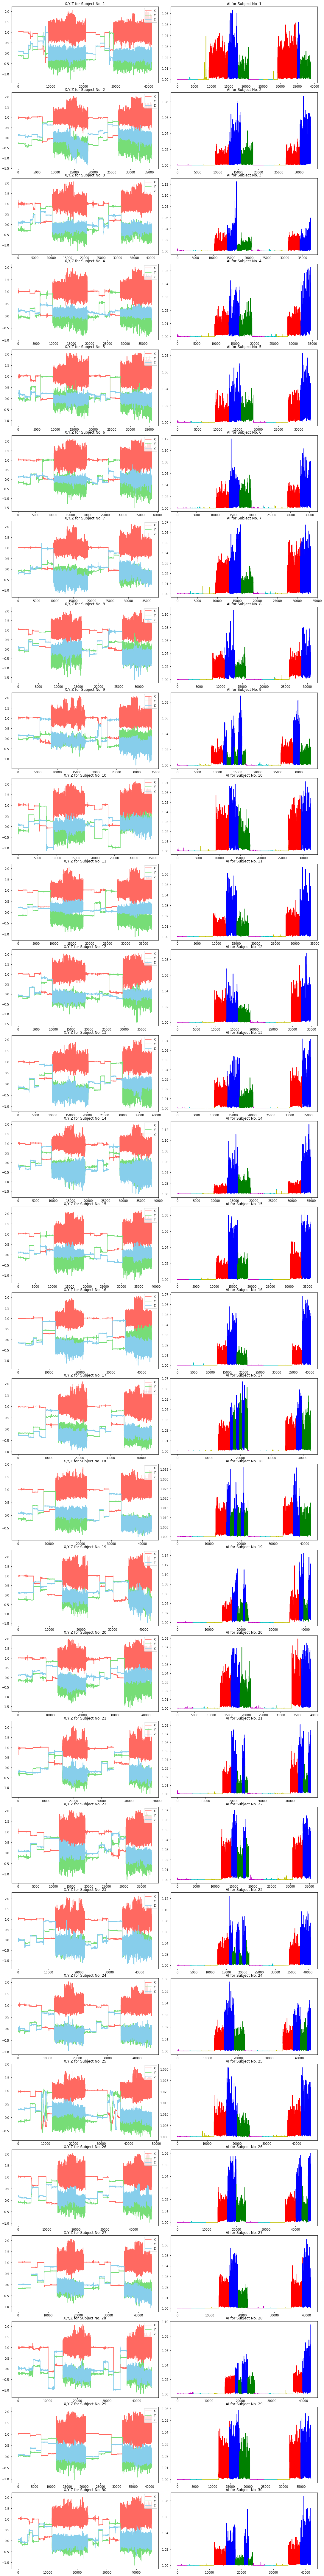

<Figure size 1080x3600 with 0 Axes>

In [20]:
label_colors = ['r','g','b','c','m','y']
    # "WALKING: red", "WALKING_UPSTAIRS: green", "WALKING_DOWNSTAIRS: blue",
    # "SITTING: cyan", "STANDING: magenta", "LAYING: yellow"

count = 0
H = 10
plot_subj = 30
    
fig, axes = plt.subplots(nrows=plot_subj, ncols=2, figsize=(15,plot_subj*4))
fig.tight_layout()

all_ai_x = []
all_ai_y = []
all_ai_z = []
acc_ai = []

ai_subj = []

for i in range(plot_subj):
    idx = i+1
    
    ai_all = []
    y_all = []
    
    all_y = [e[0] for e in all_dict[idx]]
    all_X = [e[1] for e in all_dict[idx]]
    
    
    graph_size = int(len(all_X))
    
#     print((all_X[graph_size-2]))
#     graph_size = 100 if (len(acc_train)>0) else 0
    
    #print(idx, len(acc_train))
    #print('*********')
    
    for j in range(graph_size):
        for k in range(len(all_X[j])):
            
            acc_ai = []
            
            if(k-H>=0):
                elem = all_X[j][k]
                
                all_ai_x.append(float(elem[0]))
                all_ai_y.append(float(elem[1]))
                all_ai_z.append(float(elem[2]))
                y_all.append(all_y[j])

                for m in range(H,0,-1):
                    elem = all_X[j][k-m]
                    acc_ai.append([elem[0],elem[1],elem[2]])
                    
                ai_val = equation_bi(acc_ai)
#                 print(ai_val)
                
                ai_all.append(ai_val)
    
#     print(ai_all)
    ai_subj.append(ai_all)
    
    
    ax = axes[i,0]
    
#     print(len(all_ai_x))
    graph_x_axis = [i for i in range(len(all_ai_x))]
    ax.plot(graph_x_axis,all_ai_x,'#FF6961',label='X')
    ax.plot(graph_x_axis,all_ai_y,'#77DD77',label='Y')
    ax.plot(graph_x_axis,all_ai_z,'#87CEEB',label='Z')

    ax.set_title('X,Y,Z for Subject No. ' + str(idx))
#     ax.set_ylim(bottom=-1.0,top=2.0)
    ax.legend(loc='upper right')

    ax = axes[i,1]

    if(graph_size!=0):
        prev_y_j_ = y_all[0]
        ai_graph = []
        graph_x_axis = []
        
        for j in range(len(all_ai_x)):
            y_j_ = y_all[j]
            
            graph_x_axis.append(j)
            ai_graph.append(ai_all[j])
            
            if(y_j_!=prev_y_j_ or (j+1)==graph_size):
                ax.plot(graph_x_axis,ai_graph,color=label_colors[prev_y_j_])
                
                ai_graph = []
                graph_x_axis = []
            
            prev_y_j_ = y_j_
    
#     ax.plot(ai_all)
    ax.set_title('AI for Subject No. ' + str(idx))
#     ax.set_ylim(bottom=0.99,top=1.17)

    all_ai_x = []
    all_ai_y = []
    all_ai_z = []
    
#     print(ai_labels)
    
plt.figure(figsize=(15,50))
fig.savefig('fig4.png', dpi = 300)

plt.show()

## Z-score 

In [23]:
from scipy import stats

### Z-score for each subject

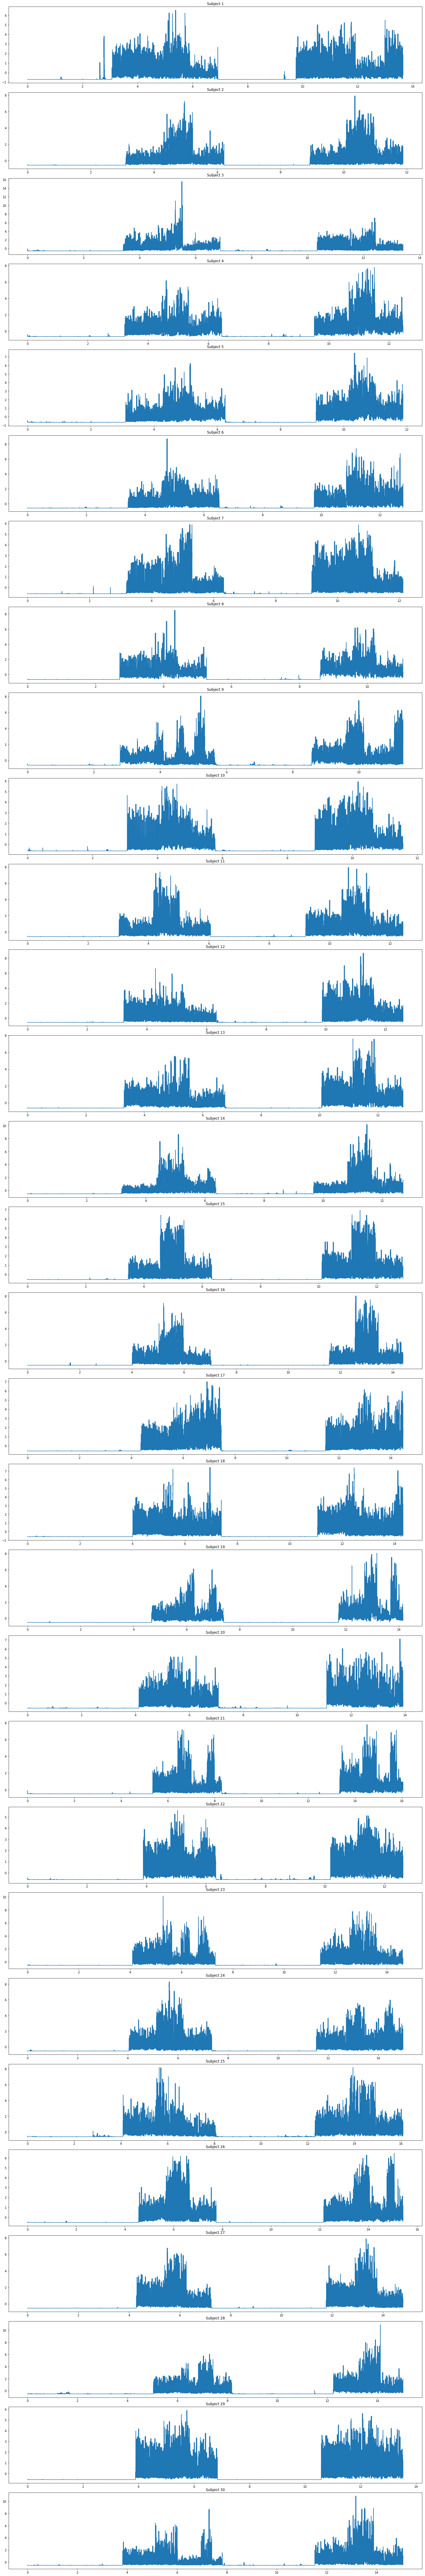

In [31]:
z = []
fig, axes = plt.subplots(nrows=plot_subj, ncols=1, figsize=(20,plot_subj*4))
plt.tight_layout()
cnt = 0
one_min = 50*60
for ai in ai_subj:
#     print(ai)
    z_score = stats.zscore(ai)
    z.append(z_score)
    x_axis = np.arange(0,len(z_score))
    x_axis = np.divide(x_axis,one_min)
#     print(x_axis)

    axes[cnt].plot(x_axis,z_score)
    axes[cnt].set_title('Subject ' + str(cnt+1))
    cnt += 1
    
plt.show()

In [38]:
for i in range(len(z)):
    z[i] = np.array(z[i])
    z_avg = np.average(z[i])
    print('--------------------')
    print('Subject ', i+1, ': ', z_avg)
    
    cnt = 0
    z_min = []
    for j in range(len(z[i])):
        z_min.append(z[i][j])
        if(cnt==one_min):
            z_min_avg = np.average(z_min)
            cnt = 0
            z_min = []
            print(int(j/one_min),z_min_avg)
        cnt += 1    
        

--------------------
Subject  1 :  1.585940548688201e-14
1 -0.7185851701409497
2 -0.7141966192134666
3 -0.6546456059604363
4 0.5765099478537665
5 0.6128212620927448
6 0.8537315353092715
7 -0.1019448122905651
8 -0.7184610305612301
9 -0.7185243650590194
10 -0.44544779348299335
11 0.6170042599599596
12 0.6864655641577413
13 0.10715564150864994
--------------------
Subject  2 :  -1.2607766940055746e-14
1 -0.5583026578859298
2 -0.5600855132716946
3 -0.5601104159052998
4 0.0251736427049512
5 0.7570900349844104
6 0.4718354186927957
7 -0.3771017385286175
8 -0.5598516616697858
9 -0.5101771268193537
10 0.22946673966642717
11 1.3642534692421837
--------------------
Subject  3 :  5.289074014982485e-15
1 -0.564127255817109
2 -0.5751371393028837
3 -0.5761571240235368
4 -0.0267971324693281
5 0.5417347554446282
6 1.076221098062304
7 0.3575604794706583
8 -0.5676797840756702
9 -0.567733848068953
10 -0.5742040099440249
11 0.18722510225247424
12 0.539383525907056
13 0.6562566314381846
--------------------

--------------------
Subject  26 :  -2.658329377371582e-14
1 -0.5349299329507943
2 -0.5347751587570789
3 -0.5361639354923593
4 -0.5357084792494435
5 -0.13827835456510662
6 0.8258431738090818
7 1.0673730339824354
8 0.188282162663575
9 -0.5350860061113398
10 -0.5360718432061734
11 -0.5359350766273333
12 -0.5362018041510123
13 0.1807264708145984
14 1.02181307324212
15 0.8433181570310908
--------------------
Subject  27 :  3.3003211094807393e-14
1 -0.5284824241539391
2 -0.5285010160471623
3 -0.5282891173543527
4 -0.5280641706354138
5 0.28011919721096723
6 1.2940367672520285
7 0.5481431446462663
8 -0.3116221887047448
9 -0.5244322105808844
10 -0.5280999034946431
11 -0.5284726532825782
12 -0.251856353701827
13 0.6129404582057589
14 1.2997443444878285
--------------------
Subject  28 :  -6.5574979606930886e-15
1 -0.5154818825328129
2 -0.49933083529177613
3 -0.5154002473125979
4 -0.5150806546469617
5 -0.5167302120306679
6 0.353351441254564
7 0.611669557703803
8 0.7494127869337237
9 -0.376823214